In [1]:
 import pandas as pd
 import numpy as np
 import seaborn as sns

In [2]:
from sklearn.datasets import load_iris      # iris 데이터셋 임포트

In [3]:
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print(iris.target)        # 0, 1, 2값은 각각 setosa, versicolor, virginica를 나타냄

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
x = iris.data
y = iris.target

In [9]:
df = pd.DataFrame(x, columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
# train data와 test data 나누기
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)      
# train data가 70%, test data가 30%

In [14]:
# 랜덤 포레스트 모델을 불러옴
from sklearn.ensemble import RandomForestClassifier

In [15]:
clf = RandomForestClassifier(n_estimators=100)    
# n_estimators: 랜덤 포레스트에 만들어지는 의사결정나무의 수

In [16]:
clf.fit(x_train, y_train)     # 훈련시킴

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
y_pred = clf.predict(x_test)       # 예측

In [19]:
from sklearn import metrics

In [20]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9777777777777777


In [21]:
# 각각의 feature(sepal...) 중 어떤 feature가 가장 큰 영향을 미쳤는지 확인
feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)

In [22]:
feature_imp

petal length (cm)    0.488346
petal width (cm)     0.368432
sepal length (cm)    0.114091
sepal width (cm)     0.029131
dtype: float64

In [23]:
import matplotlib.pyplot as plt

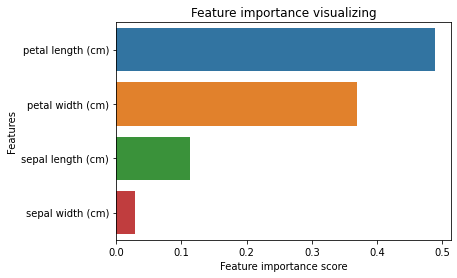

In [26]:
# 막대 그래프
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature importance score')
plt.ylabel('Features')
plt.title('Feature importance visualizing')
plt.show()